In [1]:
#IMPORT NECESSARY PACKAGES
import rpy2
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
from rpy2.robjects import r, pandas2ri
from rpy2.robjects.lib import grdevices
base = importr('base')
utils = importr('utils')
import os
import pickle
import numpy as np
import pandas as pd
import IPython
from IPython.display import Image, display
graphics = importr('graphics')
utils.chooseCRANmirror(ind=1) # select the first mirror in the list
import matplotlib.pyplot as plt
import pymysql.cursors
import datetime
import matplotlib.gridspec as grd
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from datetime import datetime
from time import mktime
if not ro.packages.isinstalled('openair'):
    utils.install_packages('openair')
r=ro.r
r.library('openair')

C:\Users\agmey\Anaconda3\envs\CO2_Eddy\lib\site-packages\rpy2\robjects\packages.py:347: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn("The symbol '%s' is not in this R namespace/package." % name)


'openair','tools','stats','graphics',...,'utils','datasets','methods','base'


In [16]:
def wind_dir(x,y,pos):
    def add_360(angle):
        if angle < 0:
            result = angle+360
        else:
            result = angle
        return result
    if pos == 1:
        result = add_360(-90 - (np.arctan2(y,x)/np.pi*180))
    elif pos == 2:
        result = add_360(90 - (np.arctan2(y,x)/np.pi*180))
    return result

In [17]:
def wind_add(df,pos):
    df['wd'] = df.apply(lambda row: wind_dir(row['ANEM_X'],row['ANEM_Y'],pos),axis=1)
    df['ws'] = df.apply(lambda row : np.sqrt(row['ANEM_X']**2+row['ANEM_Y']**2),axis=1)
    return df

In [43]:
x = [.866,.707,.5,0,-.5,-.707,-.866,-1,-.866,-.707,-.5,0,.5,.707,.866,1]
y = [.5,.707,.866,1,.866,.707,.5,0,-.5,-.707,-.866,-1,-.866,-.707,-.5,0]
df_all = pd.DataFrame({'ANEM_X':x,'ANEM_Y':y})
df_all = wind_add(df_all,1)

df_single = pd.DataFrame({'ANEM_X':[1],'ANEM_Y':[0]})
df_single = wind_add(df_single,2)
df_single

,ANEM_X,ANEM_Y,wd,ws
0,1,0,90.0,1.0


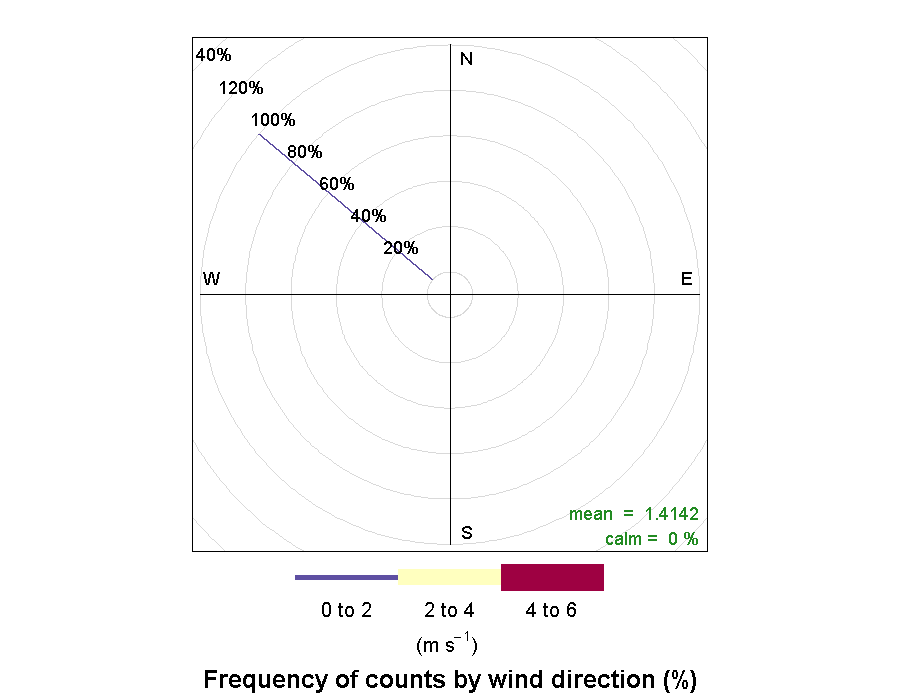

In [42]:
pandas2ri.activate()
r_dataframe = pandas2ri.py2ri(df_single)

with rpy2.robjects.lib.grdevices.render_to_bytesio(grdevices.png, width=900, height=700, res=150) as img:
    r.windRose(r_dataframe,angle=10)

IPython.display.display(IPython.display.Image(data=img.getvalue(), format='png', embed=True))
